In [2]:
import pandas as pd
import numpy as np
from scipy.stats import sem
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv("data/data.csv", index_col=0)
df = df.drop(df[df.time == "/"].index)
df = df.drop(df[df.video == "/"].index)
df = df.dropna()
df = df.reset_index()
df.seconds = pd.to_numeric(df.seconds)
df

,day,date,time,seconds,video
0,1,14/08/2021,11:02:20,6,Over Dubai
1,1,14/08/2021,19:41:28,41,Abstract - Canyon
2,3,16/08/2021,11:08:39,5,Dog POV
3,4,17/08/2021,11:49:42,642,Black hole video
4,4,17/08/2021,19:16:06,500,Two guys on a boat
...,...,...,...,...,...
361,169,19/02/2022,19:54:34,2,Abstract - Canyon
362,169,19/02/2022,19:56:38,10,Beach video
363,169,19/02/2022,20:05:50,6,Temple
364,169,19/02/2022,21:13:47,8,Shower falls


In [4]:
n_video = len(df.video.unique())
n_video

23

In [5]:
df_labels = pd.read_csv("data/video_labels_05072022.csv")
df_labels

,video,camera_movement,content_movement,color,content_type
0,Abstract - Canyon,fast,fast,changing,abstract
1,Angel falls,slow,slow,changing,nature
2,Bavarian Alps,still,fast,static,nature
3,Barcelona,cut,medium,changing,city
4,Beach video,slow,slow,static,nature
5,Black hole video,slow,slow,static,abstract
6,Blue whale,still,fast,static,animal
7,Dog POV,fast,fast,changing,animal
8,Dog shelter,cut,medium,changing,animal
9,Dog sled,slow,fast,static,animal


In [6]:
video_list = df.video.unique()
video_labels = np.asarray(df_labels.video)

In [7]:
for v in video_list:
    if v not in video_labels:
        print(v)

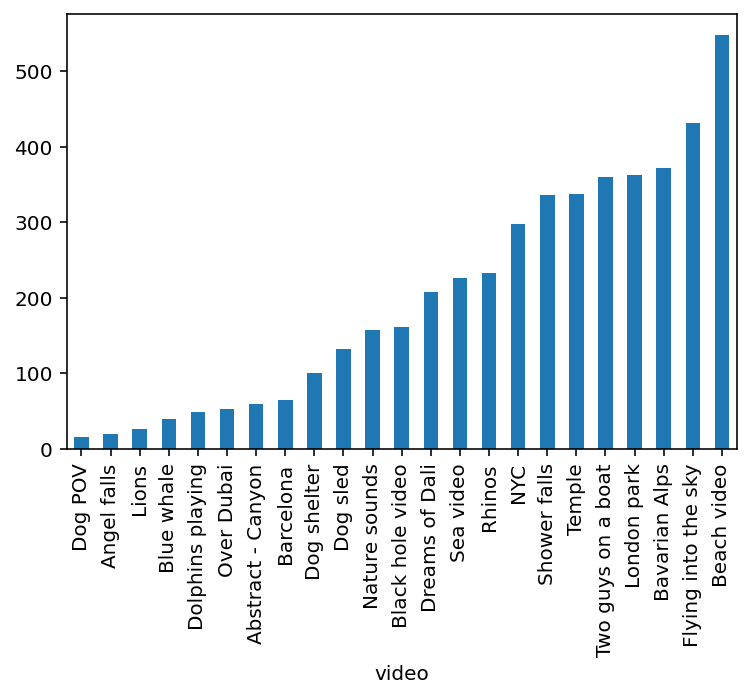

In [8]:
df.groupby('video')['seconds'].mean().sort_values().plot.bar();

In [9]:
label_categories = df_labels.columns.to_list()[1:]
label_categories

['camera_movement', 'content_movement', 'color', 'content_type']

In [10]:
df_labels[df_labels["video"]== "Over Dubai"]["camera_movement"].values[0]

'fast'

In [11]:
for index, row in df.iterrows():
    for cat in label_categories:
        label = df_labels[df_labels["video"] == row.video][cat].values[0]
        df.loc[index, cat] = label

In [12]:
df

,day,date,time,seconds,video,camera_movement,content_movement,color,content_type
0,1,14/08/2021,11:02:20,6,Over Dubai,fast,slow,static,sky
1,1,14/08/2021,19:41:28,41,Abstract - Canyon,fast,fast,changing,abstract
2,3,16/08/2021,11:08:39,5,Dog POV,fast,fast,changing,animal
3,4,17/08/2021,11:49:42,642,Black hole video,slow,slow,static,abstract
4,4,17/08/2021,19:16:06,500,Two guys on a boat,medium,medium,changing,water
...,...,...,...,...,...,...,...,...,...
361,169,19/02/2022,19:54:34,2,Abstract - Canyon,fast,fast,changing,abstract
362,169,19/02/2022,19:56:38,10,Beach video,slow,slow,static,nature
363,169,19/02/2022,20:05:50,6,Temple,slow,medium,changing,nature
364,169,19/02/2022,21:13:47,8,Shower falls,still,fast,static,nature


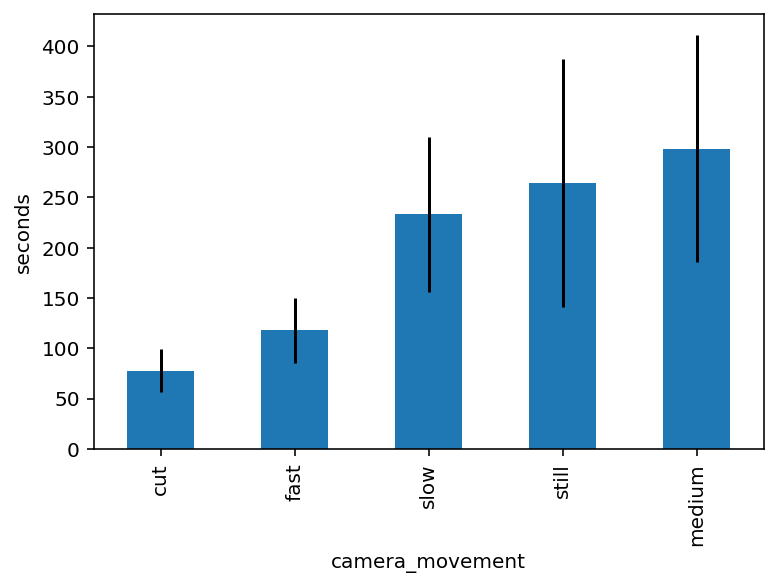

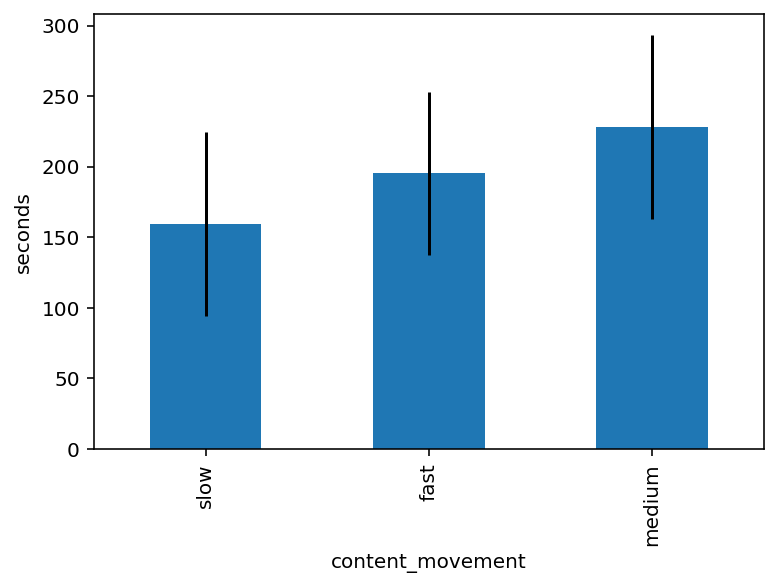

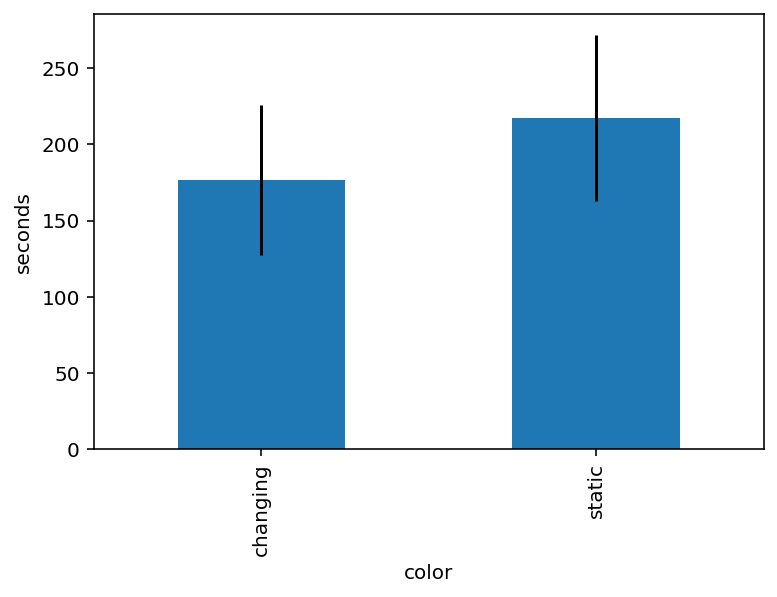

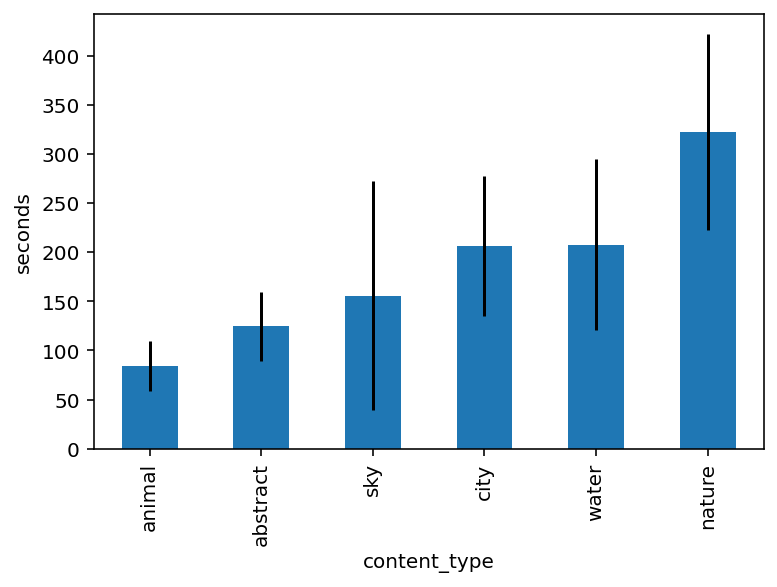

In [13]:
for cat in label_categories:
    qual = df.groupby(cat)["seconds"].agg([np.mean, sem])
    qual = qual.sort_values("mean")
    qual.plot(kind = "bar", y = "mean", ylabel="seconds", legend = False,
              yerr = "sem")
    plt.show()
    print("")

In [14]:
df.seconds.mean()

197.2377049180328

In [15]:
df.seconds.min()

1

In [16]:
df.seconds.max()

7118

(array([146.,  47.,  20.,  19.,  10.,   5.,   4.,   8.,   6.,   5.]),
 array([ 1. ,  5.7, 10.4, 15.1, 19.8, 24.5, 29.2, 33.9, 38.6, 43.3, 48. ]),
 <BarContainer object of 10 artists>)

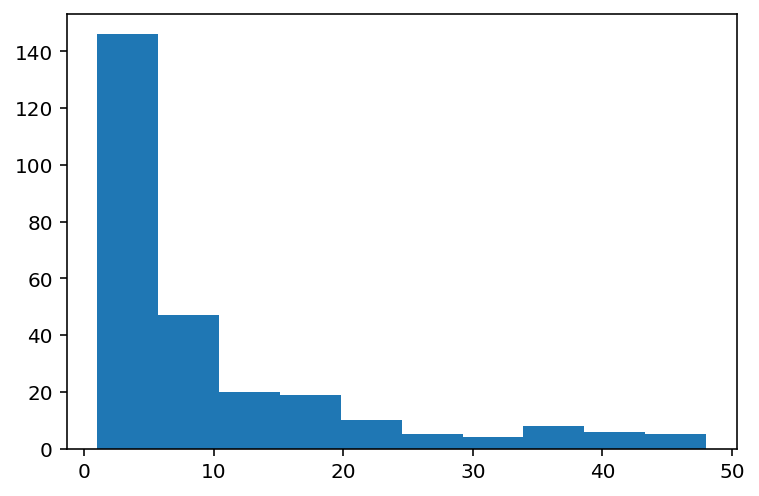

In [21]:
fig, ax = plt.subplots()
ax.hist(df.seconds[df.seconds < 50])